# Titanic Survival Prediction
by: Accever A. Mendoza

## Executive Summary

We are given the data for Titanic and various features of the passengers. We would like to determine if the person will survive or not and determine the best predictor variable. We used various classifier models but we have Gradient Boosting Method highest at 80.72% test accuracy. Interestingly, the top predictor for most of the models is sex, except for the one with highest accuracy.

We now take a look at the Titanic Data.

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

df = pd.read_excel('titanic.xls')

In [2]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,target
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [3]:
df.shape

(1309, 11)

## Data Description

The Titanic Data consists of the following features:

| Feature | Description | Type  | Sample |
|:-----:|:-----:|:-----:|:-----:|
| __Target__ | Survived or died | Categorical - Nominal | 0 = No, 1 = Yes |
| __pclass__ | Passenger's class type | Categorical - Ordinal | 1 = 1st, 2 = 2nd, 3 = 3rd |
| __name__ | Passenger's name | Categorical - Nominal | Allen, Miss. Elisabeth Walton |
| __sex__ | Passenger's gender | Categorical - Nominal | male, female |
| __age__ | Passenger's age | Numeric | 29, 0.9167 |
| __sibsp__ | Number of siblings/spouses aboard | Numeric | 0, 1 |
| __parch__ | Number of parents/children aboard | Numeric | 0, 2 |
| __ticket__ | Ticket number | Categorical - Nominal | 24160, STON/O 2 |
| __fare__ | Passenger's Fare | Numeric | 211.3375, 151.5500 |
| __cabin__ | Cabin number| Categorical - Nominal | B5, C22 C26 |
| __embarked__ | Port of embarkation | Categorical - Nominal |  C = Cherbourg, Q = Queenstown, S = Southampton|

## Cleaning the Data

We take a look first at the number of NaN values for our dataframe. Values for cabin comprises of 77% NaN values so we decided to drop instead of impute the values. For column ticket, we wouldn't want it to be a predictor for the survival because it is just the ticket number. For features namely age, fare and embarked, we dropped the rows with incomplete values. Column name was also changed to become the index of the dataframe. Categorical features were converted using one-hot encoding through the pandas.get_dummies() function. This is to assign numbers to certain categories.

In [4]:
df.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
target         0
dtype: int64

In [5]:
df.drop(['cabin', 'ticket'], axis=1, inplace=True)
df.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,target
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,0


In [6]:
df.dropna(subset=['age','fare','embarked'], inplace=True)
df.head()

,pclass,name,sex,age,sibsp,parch,fare,embarked,target
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,S,0


In [7]:
df.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'target'],
      dtype='object')

In [8]:
df.set_index(['name'], inplace=True)
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,target
name,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,1
"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,1
"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0
"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0


In [9]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,pclass,age,sibsp,parch,fare,target,sex_male,embarked_Q,embarked_S
name,,,,,,,,,
"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,211.3375,1,0,0,1
"Allison, Master. Hudson Trevor",1,0.9167,1,2,151.5500,1,1,0,1
"Allison, Miss. Helen Loraine",1,2.0000,1,2,151.5500,0,0,0,1
"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,151.5500,0,1,0,1
"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,151.5500,0,0,0,1


## Exploratory Data Analysis

We now look at the pairplot of the features to see if there are visible predictor for our target.

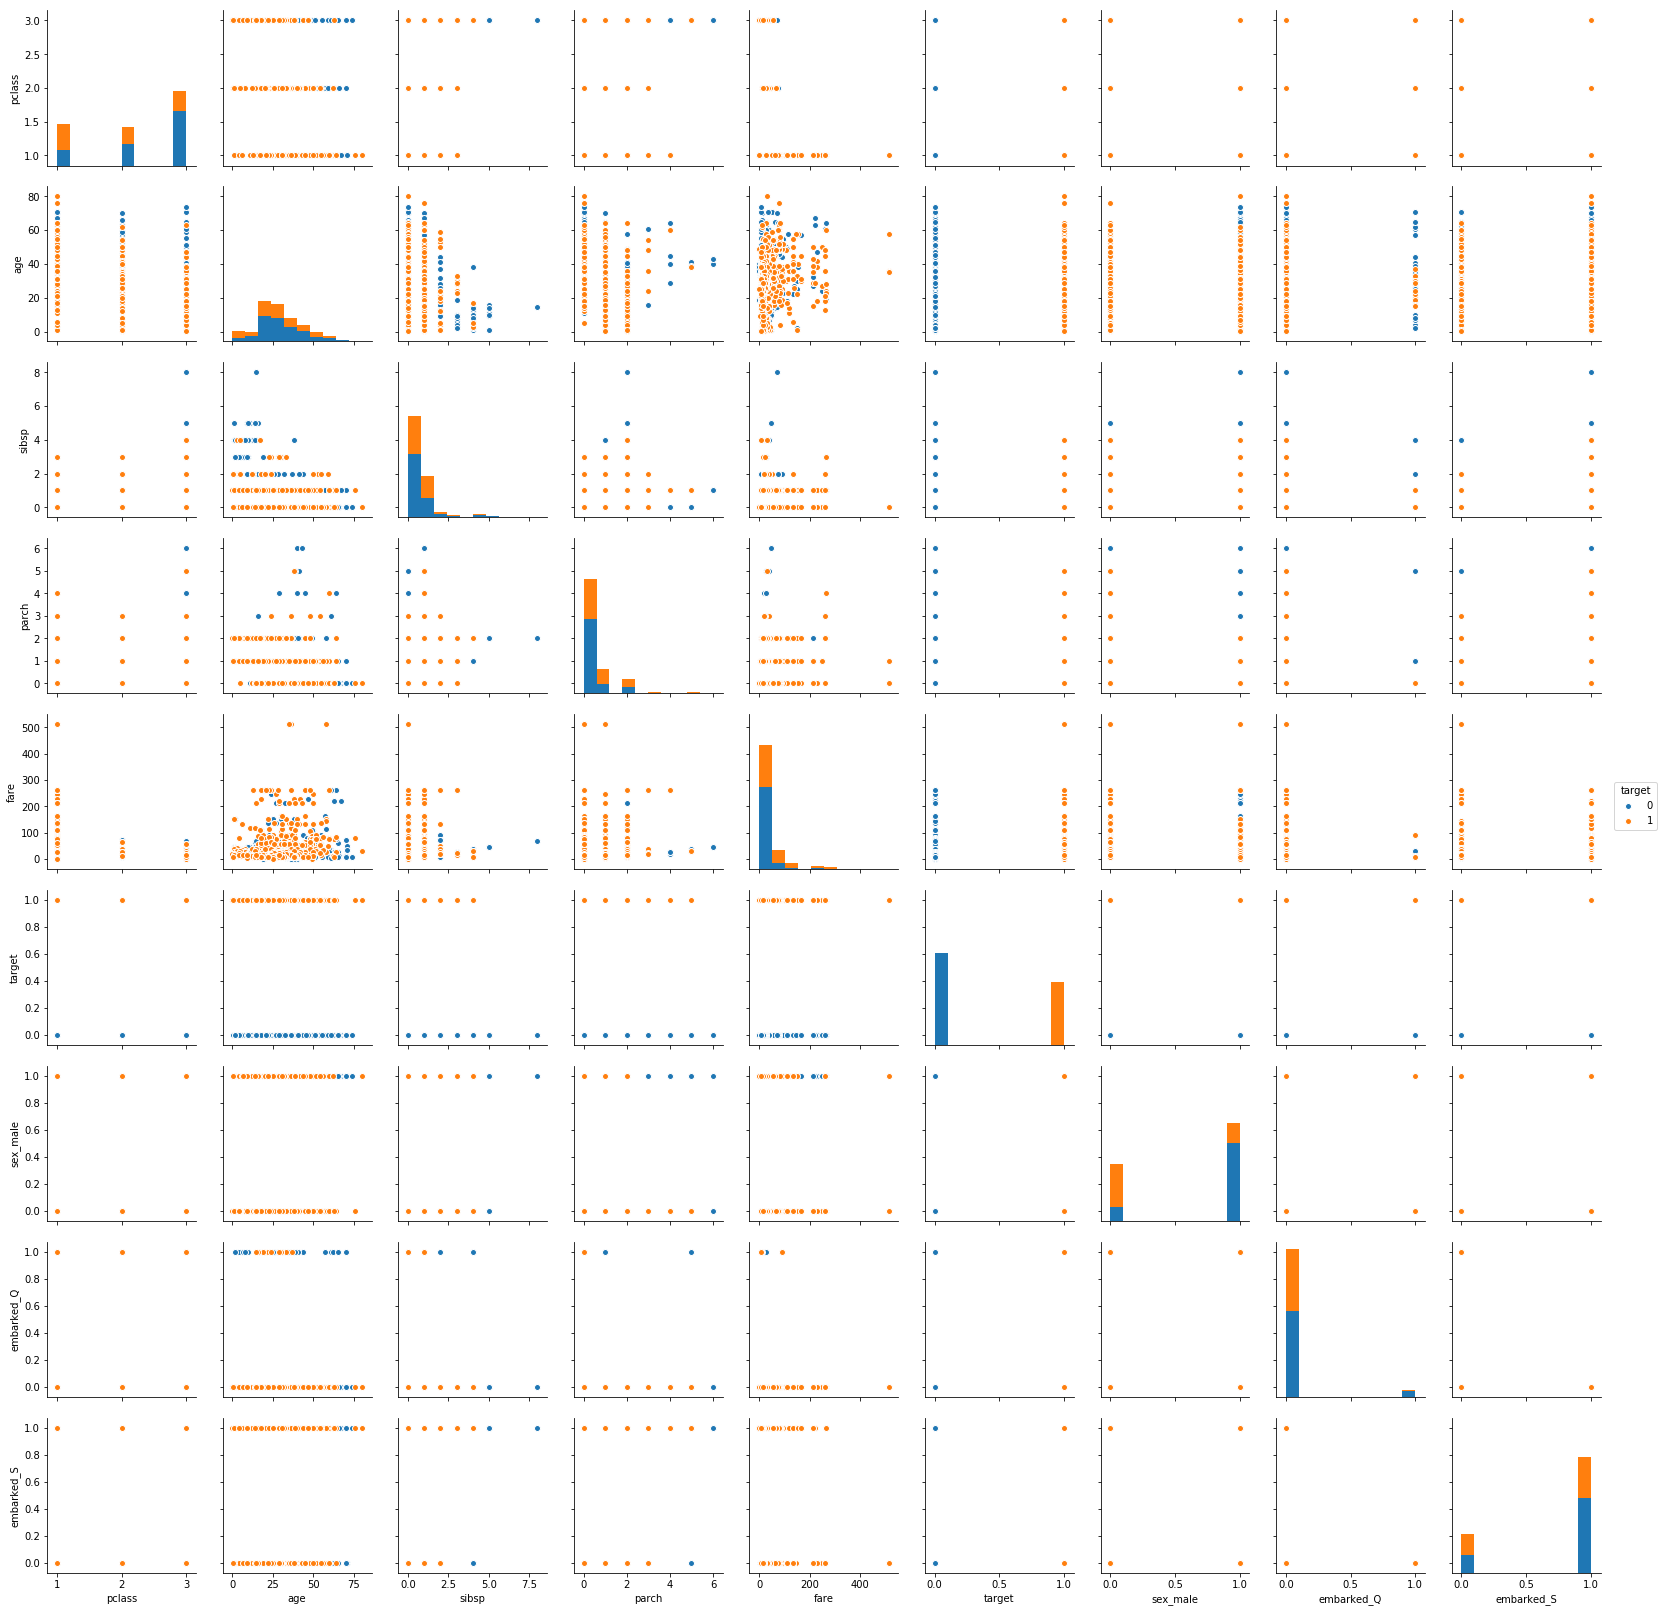

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.pairplot(df, hue="target")

Note that we cannot clearly separate the variables thus we look for other ways to determine the predictor.

In the code below, we do some scaling because we only have a few models where scaling is not necessary. We are doing this because we are generalizing the models to be used later on.

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
scaler = StandardScaler()

X = df.drop(columns=['target'])
y = df[['target']]

cols = X.columns
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = cols

We calculate the __Proportional Chance Criterion (PCC)__. In practice, PCC multiplied by 1.25 gives us the percentage score that would allow us to decide on whether or not we have a good classifier.

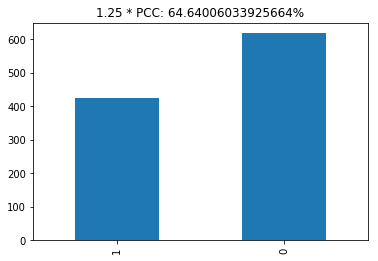

In [12]:
state_counts = Counter(df['target'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar', colormap='tab10')

pcc1 = (df_state[0]/df_state[0].sum())**2
score_to_beat = 1.25*100*pcc1.sum()
plt.title("1.25 * PCC: {}%".format(score_to_beat));
plt.legend().set_visible(False)

## Model

We will be using the following models for the classifier problem:
* [KNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Logistic Regression (L1 and L2)](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Linear SVM (L1 and L2)](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)   
* [Decision Tree](http://scikit-learn.org/stable/modules/tree.html)
* [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [Gradient Boosting Machine (GBM)](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


def train_KNN(X, y, n_neighbors=20, random_states=10):

    res = pd.DataFrame(
        columns=['n_neighbors', 'mean train score', 'std train score',
                 'mean test score', 'std test score'])

    #i = n_neighbors
    for i in range(1, n_neighbors+1):
        train_scores = []
        test_scores = []

        #ii = random_state
        for ii in range(0, random_states):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=ii)

            clf = KNeighborsClassifier(n_neighbors=i)
            clf.fit(X_train, y_train)

            train_scores.append(clf.score(X_train, y_train))
            test_scores.append(clf.score(X_test, y_test))

        res.loc[i] = [i, np.mean(train_scores) * 100,
                      np.std(train_scores),
                      np.mean(test_scores)*100,
                      np.std(test_scores)]
    summary_ = ['KNN',
                res['mean test score'].max(),
                'N_Neighbor = {0}'.format(
                    res['n_neighbors'][res['mean test score'].idxmax()]),
                'NA']
    
    fc = pd.DataFrame(columns=['features', 'coeff'])
    
    return summary_, fc

def train_Linear(X, y, C, ml_method='Logistic', penalty='l1', random_states=10):

    res = pd.DataFrame(
        columns=['C', 'mean train score', 'std train score',
                 'mean test score', 'std test score', 'Top Predictor Variable'])

    weighted_coefs = []

    for i in C:
        train_scores = []
        test_scores = []
        coefs = []

        #ii = random_state
        for ii in range(0, random_states):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=ii)

            if ml_method == 'Logistic':
                clf = LogisticRegression(C=i, penalty=penalty)
            elif ml_method == 'Linear SVM':
                if penalty == "l1":
                    clf = LinearSVC(C=i, penalty="l1",
                                    loss='squared_hinge', dual=False)
                else:
                    clf = LinearSVC(C=i, penalty="l2")
            else:
                raise ValueError('ml_method not recognized')

            clf.fit(X_train, y_train)

            train_scores.append(clf.score(X_train, y_train))
            test_scores.append(clf.score(X_test, y_test))
            coefs.append(np.absolute(clf.coef_[0]))

            # store feature coefficients for this C value
            if i == 0.1:
                weighted_coefs.append(clf.coef_)

        res.loc[i] = [i, np.mean(train_scores) * 100,
                      np.std(train_scores),
                      np.mean(test_scores)*100,
                      np.std(test_scores),
                      list(X)[np.argmax(np.mean(coefs, axis=0))]]

    # store feature coefficients in a dataframe
    mean_coefs = np.mean(weighted_coefs, axis=0)
    fc = pd.DataFrame(columns=['features', 'coeff'])
    fc['features'] = list(X)
    fc['coeff'] = np.abs(mean_coefs[0]).tolist()
    fc.set_index('features', inplace=True)
    fc = fc.sort_values('coeff')

    # results summary for max test score
    summary_ = ['{0} {1}'.format(ml_method, penalty),
                res['mean test score'].max(),
                'C = {0}'.format(
        res['C'][res['mean test score'].idxmax()]),
        res['Top Predictor Variable'][res.index[res['C'] == 0.1].tolist()[0]]]

    return summary_, fc

def train_Tree(X, y, ml_method='Decision Tree', depth=5, random_states=10):

    res = pd.DataFrame(
        columns=['depth', 'mean train score', 'std train score',
                 'mean test score', 'std test score', 'mean_coef'])

    #i = depth
    for i in range(2, depth+1):
        train_scores = []
        test_scores = []
        coefs = []

        #ii = random_state
        for ii in range(0, random_states):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.25, random_state=ii)
            
            if ml_method == 'Decision Tree':
                clf = DecisionTreeClassifier(max_depth=i, random_state=10)
            elif ml_method == 'Random Forest':
                clf = RandomForestClassifier(max_depth=i, random_state=10, n_estimators=100)
            elif ml_method == 'GBM':
                clf = GradientBoostingClassifier(max_depth=i, random_state=0, learning_rate=0.1)
            else:
                raise ValueError('ml_method not recognized')
            
            clf.fit(X_train, y_train)

            train_scores.append(clf.score(X_train, y_train))
            test_scores.append(clf.score(X_test, y_test))
            coefs.append(clf.feature_importances_)
                
        res.loc[i] = [i, np.mean(train_scores) * 100,
                      np.std(train_scores),
                      np.mean(test_scores)*100,
                      np.std(test_scores),
                      np.mean(coefs, axis=0)]
    
    mean_coefs = res['mean_coef'][res['mean test score'].idxmax()]
    fc = pd.DataFrame(columns=['features', 'coeff'])
    fc['features'] = list(X)
    fc['coeff'] = np.abs(mean_coefs).tolist()
    fc.set_index('features', inplace=True)
    fc = fc.sort_values('coeff')
    
    summary_ = [ml_method,
                res['mean test score'].max(),
                'depth = {0}'.format(res['depth'][res['mean test score'].idxmax()]),
                fc['coeff'].idxmax()]

    return summary_, fc

In [14]:
C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]

model = []

model.append(train_KNN(X, y['target']))
model.append(train_Linear(X, y['target'], C, ml_method='Logistic', penalty='l2'))
model.append(train_Linear(X, y['target'], C, ml_method='Logistic', penalty='l1'))
model.append(train_Linear(X, y['target'], C, ml_method='Linear SVM', penalty='l2'))
model.append(train_Linear(X, y['target'], C, ml_method='Linear SVM', penalty='l1'))
model.append(train_Tree(X, y['target'], ml_method='Decision Tree', depth=5))
model.append(train_Tree(X, y['target'], ml_method='Random Forest', depth=5))
model.append(train_Tree(X, y['target'], ml_method='GBM', depth=5))

In [15]:
df2 = pd.DataFrame(columns=['Machine Learning Method', 'Test Accuracy',
        'Best Parameter', 'Top Predictor Variable'])

for i in range(8):
    df2.loc[i] = model[i][0]

display(df2)

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable
0,KNN,79.655172,N_Neighbor = 10.0,NA
1,Logistic l2,77.356322,C = 3.0,sex_male
2,Logistic l1,77.356322,C = 3.0,sex_male
3,Linear SVM l2,77.356322,C = 0.1,sex_male
4,Linear SVM l1,77.279693,C = 0.01,sex_male
5,Decision Tree,79.693487,depth = 3,sex_male
6,Random Forest,79.693487,depth = 5,sex_male
7,GBM,80.727969,depth = 4,fare


## Conclusion

From the above data, we could see that the highest accuracy is given by Gradient Boosting Method at 80.72% test accuracy with top predictor variable of fare. We have next Decision Tree and Random Forest model with test accuracy tied at 79.69% having sex as top predictor variable but with different depths.

Looking at the predictors for survival, we could see that it is how the society works. If we can recall in the movie, the ones who are at the top floors(i.e. paid more) are prioritized to be saved and also the women. This is reflected in our model.

## Citations

https://www.kaggle.com/c/titanic/data

I would like to thank Prof. Chris Monterola, Prof. Erika Legara, Joseph Bunao and Jon Colipapa for their help in the construction of this notebook.